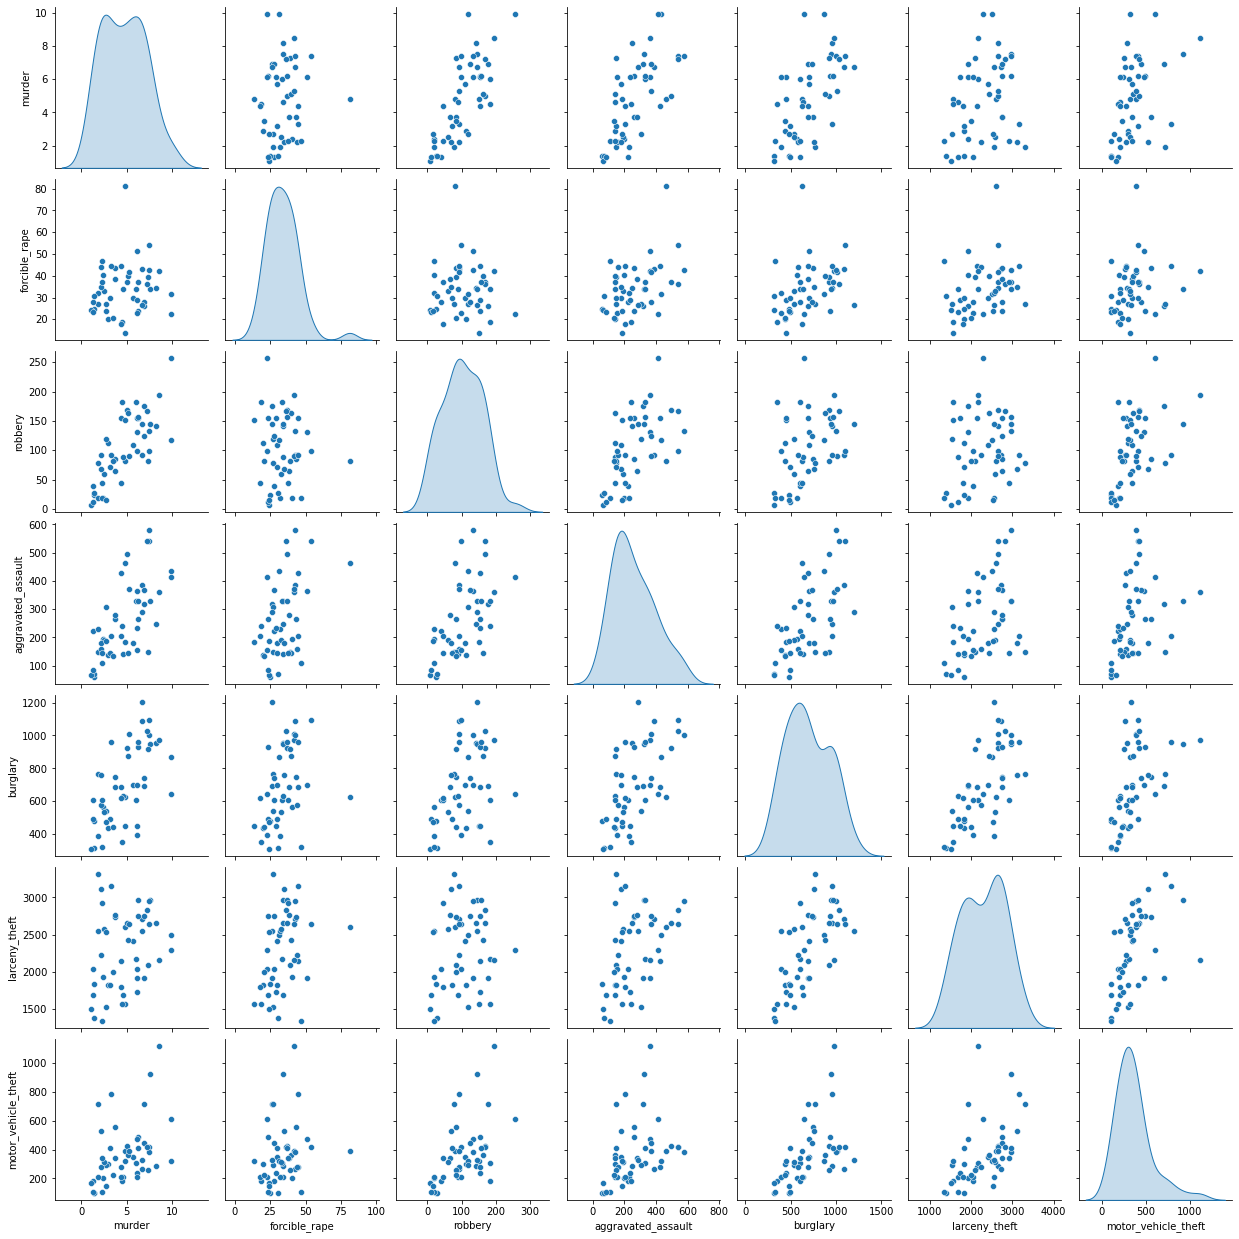

In [1]:
# 散点矩阵
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 导入数据
crime = pd.read_csv("../data/第五章数据/crimeRatesByState2005.csv")
# 删除数据
crime2 = crime[crime.state != 'United States']
crime2 = crime2[crime2.state != 'District of Columbia']
crime2 = crime2.drop(['state'], axis=1)
crime2 = crime2.drop(['population'], axis=1)
g = sns.pairplot(crime2, diag_kind="kde")
plt.show()

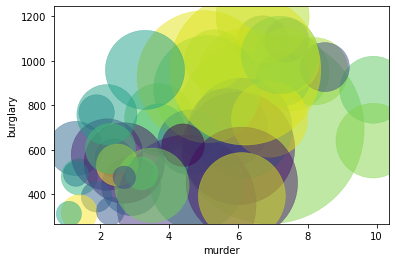

In [4]:
# 气泡图
from turtle import color
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

crime = pd.read_csv("../data/第五章数据/crimeRatesByState2005.csv")
crime2 = crime[crime.state != 'United States']
crime2 = crime2[crime2.state != 'District of Columbia']
s = list(crime2.population/1000)
color = np.random.rand(len(list(crime2.murder)))
plt.scatter(
    x=list(crime2.murder),
    y=list(crime2.burglary),
    s=s,
    c=color,
    linewidths=0.5,
    alpha=0.5
)
plt.xlabel("murder")
plt.ylabel("burglary")
plt.show()

In [1]:
from pyecharts.charts import Scatter
import pyecharts.options as opts
import pandas as pd

# 导入数据
crime = pd.read_csv('../data/第五章数据/crimeRatesByState2005.csv')
crime2 = crime[crime.state != "United States"]
crime2 = crime2[crime2.state != "District of Columbia"]

c = (
    Scatter()
    .add_xaxis(xaxis_data=crime2.murder)
    .add_yaxis('气泡散点图', y_axis=list(crime2.burglary))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="2005年美国各州的犯罪情况"),
        visualmap_opts=opts.VisualMapOpts(type_="size", max_=1400, min_=200,),
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
)

# c.render('../html/crimeRatesByState2005.html')
c.render_notebook()

In [5]:
from pyecharts.charts import Bar
import pandas as pd
import pyecharts.options as opts

# 读取数据
titanic = pd.read_csv("../data/第五章数据/birth-rate.csv")
titanic.dropna(subset=['2008'], inplace=True)
data = titanic['2008']
datax = list(range(5, 100, 10))
datay = [0 for i in range(10)]
for birth in data:
    for i, x in enumerate(datax):
        if (x - 5) <= birth < (x + 5):
            datay[i] += 1
bar = (
    Bar()
    .add_xaxis(xaxis_data=datax)
    .add_yaxis("出生率", y_axis=datay)
    .set_global_opts(title_opts=opts.TitleOpts(title="各国的出生率的分布直方图"))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
)

# bar.render("../html/birth-rate.html")
bar.render_notebook()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: JetBrains Mono


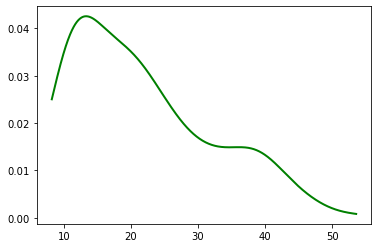

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.rcParams['font.sans-serif'] = ['JetBrains Mono']
plt.rcParams['axes.unicode_minus'] = False
titanic = pd.read_csv('../data/第五章数据/birth-rate.csv')
titanic.dropna(subset=['2008'], inplace=True)
kde = mlab.GaussianKDE(titanic['2008'])
x2 = np.linspace(titanic['2008'].min(), titanic['2008'].max(), 1000)
line2 = plt.plot(x2, kde(x2), 'g-', linewidth = 2)
plt.show()